In [1]:



from google.colab import drive
import pandas as pd

# Mount Google Drive
drive.mount('/content/drive')

# Path to the CSV file in your Google Drive
drive_csv_path = '/content/drive/My Drive/emotions_wonoiseUPD2.csv'

# Read CSV file into DataFrame
df = pd.read_csv(drive_csv_path)

# Display the first few rows of the DataFrame
print(df.head())


Mounted at /content/drive
          0         1         2         3         4         5         6  \
0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000977  0.005371   
1  0.000000  0.000000  0.000000  0.000000  0.000000  0.000977  0.005371   
2  0.004395  0.004883  0.004883  0.001953  0.006836  0.015137  0.025391   
3  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
4  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

          7         8         9  ...      2367      2368      2369      2370  \
0  0.020996  0.046875  0.061523  ...  1.445391  0.328134  1.743512 -2.562575   
1  0.020996  0.046875  0.061523  ...  1.445391  0.328140  1.743517 -2.562577   
2  0.034668  0.062500  0.069824  ...  2.482418  0.526144 -3.485873 -0.455059   
3  0.000000  0.000000  0.000000  ...       NaN       NaN       NaN       NaN   
4  0.000000  0.000000  0.000000  ...       NaN       NaN       NaN       NaN   

       2371      2372      2373      2374 

In [13]:
Emotions=df

In [14]:
print(Emotions.isna().any())


0           False
1           False
2           False
3           False
4           False
            ...  
2372         True
2373         True
2374         True
2375         True
Emotions    False
Length: 2377, dtype: bool


In [15]:
Emotions=Emotions.fillna(0)
print(Emotions.isna().any())
Emotions.shape

0           False
1           False
2           False
3           False
4           False
            ...  
2372        False
2373        False
2374        False
2375        False
Emotions    False
Length: 2377, dtype: bool


(33603, 2377)

In [16]:
import numpy as np
np.sum(Emotions.isna())

0           0
1           0
2           0
3           0
4           0
           ..
2372        0
2373        0
2374        0
2375        0
Emotions    0
Length: 2377, dtype: int64

In [17]:


X = Emotions.iloc[: ,:-1].values
Y = Emotions['Emotions'].values

In [18]:

from sklearn.preprocessing import StandardScaler, OneHotEncoder
encoder = OneHotEncoder()
Y = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()
print(Y.shape)
X.shape

(33603, 7)


(33603, 2376)

In [19]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=42,test_size=0.2, shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((26882, 2376), (26882, 7), (6721, 2376), (6721, 7))

In [20]:

X_train = x_train.reshape(x_train.shape[0] , x_train.shape[1] , 1)
X_test = x_test.reshape(x_test.shape[0] , x_test.shape[1] , 1)

In [21]:

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((26882, 2376), (26882, 7), (6721, 2376), (6721, 7))

In [22]:


x_traincnn =np.expand_dims(x_train, axis=2)
x_testcnn= np.expand_dims(x_test, axis=2)
x_traincnn.shape, y_train.shape, x_testcnn.shape, y_test.shape


((26882, 2376, 1), (26882, 7), (6721, 2376, 1), (6721, 7))

In [23]:
from keras.callbacks import ModelCheckpoint, EarlyStopping,ReduceLROnPlateau
model_checkpoint = ModelCheckpoint('best_model1_weights.h5', monitor='val_accuracy', save_best_only=True)

In [24]:
early_stop=EarlyStopping(monitor='val_acc',mode='auto',patience=5,restore_best_weights=True)
lr_reduction=ReduceLROnPlateau(monitor='val_acc',patience=3,verbose=1,factor=0.5,min_lr=0.00001)

In [25]:
import os
import sys

import librosa
import librosa.display
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

import IPython.display as ipd
from IPython.display import Audio
import keras
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM,BatchNormalization , GRU
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import SGD



import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)
import tensorflow as tf

In [26]:
import tensorflow as tf
from tensorflow.keras.layers import Conv1D, BatchNormalization, MaxPooling1D, Dropout, Flatten, Dense

model = tf.keras.Sequential([
    Conv1D(512, kernel_size=5, strides=1, padding='same', activation='relu', input_shape=(X_train.shape[1], 1)),
    BatchNormalization(),
    MaxPooling1D(pool_size=5, strides=2, padding='same'),

    Conv1D(512, kernel_size=5, strides=1, padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling1D(pool_size=5, strides=2, padding='same'),
    Dropout(0.2),

    Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling1D(pool_size=5, strides=2, padding='same'),

    Conv1D(256, kernel_size=3, strides=1, padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling1D(pool_size=5, strides=2, padding='same'),
    Dropout(0.2),

    Conv1D(128, kernel_size=3, strides=1, padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling1D(pool_size=3, strides=2, padding='same'),
    Dropout(0.2),

    Conv1D(64, kernel_size=3, strides=1, padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling1D(pool_size=3, strides=2, padding='same'),

    Conv1D(64, kernel_size=3, strides=1, padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling1D(pool_size=3, strides=2, padding='same'),
    Dropout(0.2),

    Flatten(),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dense(7, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 2376, 512)         3072      
                                                                 
 batch_normalization (Batch  (None, 2376, 512)         2048      
 Normalization)                                                  
                                                                 
 max_pooling1d (MaxPooling1  (None, 1188, 512)         0         
 D)                                                              
                                                                 
 conv1d_1 (Conv1D)           (None, 1188, 512)         1311232   
                                                                 
 batch_normalization_1 (Bat  (None, 1188, 512)         2048      
 chNormalization)                                                
                                                        

In [27]:
history=model.fit(x_traincnn, y_train, epochs=25, validation_data=(x_testcnn, y_test), batch_size=64,callbacks=[early_stop,lr_reduction,model_checkpoint])

Epoch 1/25
421/421 [==============================] - ETA: 0s - loss: 1.5127 - accuracy: 0.4292

421/421 [==============================] - 149s 315ms/step - loss: 1.5127 - accuracy: 0.4292 - val_loss: 2.1096 - val_accuracy: 0.2366 - lr: 0.0010
Epoch 2/25


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


420/421 [============================>.] - ETA: 0s - loss: 1.1717 - accuracy: 0.5416

421/421 [==============================] - 137s 326ms/step - loss: 1.1718 - accuracy: 0.5415 - val_loss: 1.3574 - val_accuracy: 0.4886 - lr: 0.0010
Epoch 3/25
420/421 [============================>.] - ETA: 0s - loss: 1.0850 - accuracy: 0.5746

421/421 [==============================] - 137s 325ms/step - loss: 1.0850 - accuracy: 0.5745 - val_loss: 1.1212 - val_accuracy: 0.5667 - lr: 0.0010
Epoch 4/25
420/421 [============================>.] - ETA: 0s - loss: 0.9673 - accuracy: 0.6235

421/421 [==============================] - 137s 326ms/step - loss: 0.9673 - accuracy: 0.6235 - val_loss: 1.0440 - val_accuracy: 0.5950 - lr: 0.0010
Epoch 5/25
420/421 [============================>.] - ETA: 0s - loss: 0.9099 - accuracy: 0.6449

421/421 [==============================] - 137s 326ms/step - loss: 0.9100 - accuracy: 0.6449 - val_loss: 1.0973 - val_accuracy: 0.5727 - lr: 0.0010
Epoch 6/25
420/421 [============================>.] - ETA: 0s - loss: 0.8939 - accuracy: 0.6544

421/421 [==============================] - 139s 330ms/step - loss: 0.8940 - accuracy: 0.6543 - val_loss: 0.9145 - val_accuracy: 0.6514 - lr: 0.0010
Epoch 7/25
420/421 [============================>.] - ETA: 0s - loss: 0.8318 - accuracy: 0.6770

421/421 [==============================] - 139s 330ms/step - loss: 0.8319 - accuracy: 0.6770 - val_loss: 0.8343 - val_accuracy: 0.6730 - lr: 0.0010
Epoch 8/25
420/421 [============================>.] - ETA: 0s - loss: 0.7565 - accuracy: 0.7090

421/421 [==============================] - 139s 330ms/step - loss: 0.7567 - accuracy: 0.7090 - val_loss: 1.1502 - val_accuracy: 0.5736 - lr: 0.0010
Epoch 9/25
420/421 [============================>.] - ETA: 0s - loss: 0.7500 - accuracy: 0.7143

421/421 [==============================] - 139s 330ms/step - loss: 0.7500 - accuracy: 0.7143 - val_loss: 0.7740 - val_accuracy: 0.7039 - lr: 0.0010
Epoch 10/25
420/421 [============================>.] - ETA: 0s - loss: 0.6517 - accuracy: 0.7527

421/421 [==============================] - 139s 331ms/step - loss: 0.6518 - accuracy: 0.7527 - val_loss: 0.7766 - val_accuracy: 0.7047 - lr: 0.0010
Epoch 11/25
420/421 [============================>.] - ETA: 0s - loss: 0.6491 - accuracy: 0.7550

421/421 [==============================] - 139s 330ms/step - loss: 0.6493 - accuracy: 0.7550 - val_loss: 0.8788 - val_accuracy: 0.6762 - lr: 0.0010
Epoch 12/25
420/421 [============================>.] - ETA: 0s - loss: 0.5913 - accuracy: 0.7779

421/421 [==============================] - 137s 325ms/step - loss: 0.5914 - accuracy: 0.7778 - val_loss: 0.8126 - val_accuracy: 0.7020 - lr: 0.0010
Epoch 13/25
420/421 [============================>.] - ETA: 0s - loss: 0.6001 - accuracy: 0.7744

421/421 [==============================] - 137s 325ms/step - loss: 0.6001 - accuracy: 0.7744 - val_loss: 0.5316 - val_accuracy: 0.8005 - lr: 0.0010
Epoch 14/25
420/421 [============================>.] - ETA: 0s - loss: 0.4551 - accuracy: 0.8304

421/421 [==============================] - 138s 329ms/step - loss: 0.4551 - accuracy: 0.8304 - val_loss: 0.5667 - val_accuracy: 0.7904 - lr: 0.0010
Epoch 15/25
420/421 [============================>.] - ETA: 0s - loss: 0.4353 - accuracy: 0.8402

421/421 [==============================] - 139s 329ms/step - loss: 0.4355 - accuracy: 0.8401 - val_loss: 0.5210 - val_accuracy: 0.8084 - lr: 0.0010
Epoch 16/25
420/421 [============================>.] - ETA: 0s - loss: 0.4464 - accuracy: 0.8344

421/421 [==============================] - 138s 329ms/step - loss: 0.4465 - accuracy: 0.8344 - val_loss: 0.5882 - val_accuracy: 0.7908 - lr: 0.0010
Epoch 17/25
420/421 [============================>.] - ETA: 0s - loss: 0.4051 - accuracy: 0.8516

421/421 [==============================] - 139s 329ms/step - loss: 0.4053 - accuracy: 0.8515 - val_loss: 0.4604 - val_accuracy: 0.8343 - lr: 0.0010
Epoch 18/25
420/421 [============================>.] - ETA: 0s - loss: 0.3264 - accuracy: 0.8836

421/421 [==============================] - 139s 329ms/step - loss: 0.3266 - accuracy: 0.8836 - val_loss: 0.4194 - val_accuracy: 0.8479 - lr: 0.0010
Epoch 19/25
420/421 [============================>.] - ETA: 0s - loss: 0.3718 - accuracy: 0.8650

421/421 [==============================] - 137s 325ms/step - loss: 0.3720 - accuracy: 0.8649 - val_loss: 0.3372 - val_accuracy: 0.8842 - lr: 0.0010
Epoch 20/25
420/421 [============================>.] - ETA: 0s - loss: 0.2632 - accuracy: 0.9071

421/421 [==============================] - 137s 325ms/step - loss: 0.2635 - accuracy: 0.9070 - val_loss: 0.3440 - val_accuracy: 0.8856 - lr: 0.0010
Epoch 21/25
420/421 [============================>.] - ETA: 0s - loss: 0.2869 - accuracy: 0.8967

421/421 [==============================] - 137s 325ms/step - loss: 0.2869 - accuracy: 0.8967 - val_loss: 0.3422 - val_accuracy: 0.8847 - lr: 0.0010
Epoch 22/25
420/421 [============================>.] - ETA: 0s - loss: 0.3753 - accuracy: 0.8663

421/421 [==============================] - 137s 326ms/step - loss: 0.3754 - accuracy: 0.8663 - val_loss: 0.3310 - val_accuracy: 0.8871 - lr: 0.0010
Epoch 23/25
420/421 [============================>.] - ETA: 0s - loss: 0.2423 - accuracy: 0.9119

421/421 [==============================] - 137s 326ms/step - loss: 0.2423 - accuracy: 0.9119 - val_loss: 0.2360 - val_accuracy: 0.9229 - lr: 0.0010
Epoch 24/25
420/421 [============================>.] - ETA: 0s - loss: 0.1740 - accuracy: 0.9395

421/421 [==============================] - 137s 326ms/step - loss: 0.1741 - accuracy: 0.9395 - val_loss: 0.2448 - val_accuracy: 0.9241 - lr: 0.0010
Epoch 25/25
420/421 [============================>.] - ETA: 0s - loss: 0.2439 - accuracy: 0.9141

421/421 [==============================] - 139s 330ms/step - loss: 0.2438 - accuracy: 0.9141 - val_loss: 0.2252 - val_accuracy: 0.9286 - lr: 0.0010


211/211 [==============================] - 11s 45ms/step - loss: 0.2252 - accuracy: 0.9286
Accuracy of our model on test data :  92.85820722579956 %


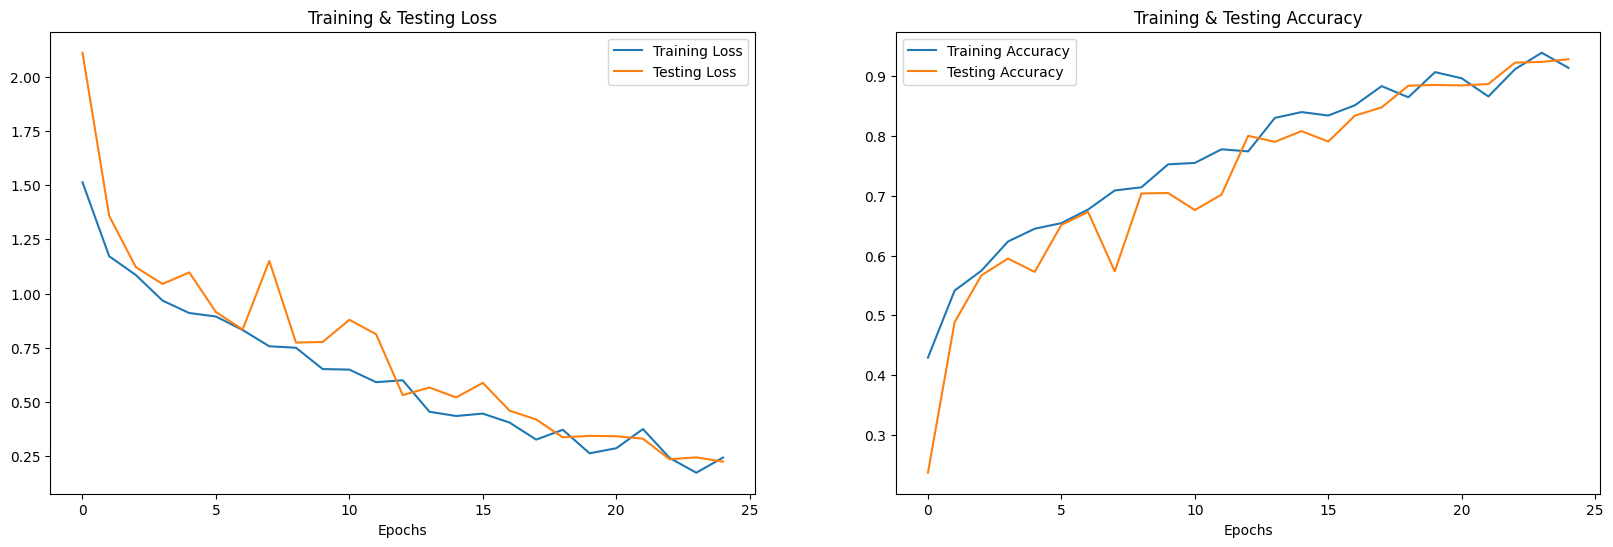

In [28]:
print("Accuracy of our model on test data : " , model.evaluate(x_testcnn,y_test)[1]*100 , "%")

epochs = [i for i in range(25)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()

In [29]:
# predicting on test data.
pred_test0 = model.predict(x_testcnn)
y_pred0 = encoder.inverse_transform(pred_test0)
y_test0 = encoder.inverse_transform(y_test)

# Check for random predictions
df0 = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df0['Predicted Labels'] = y_pred0.flatten()
df0['Actual Labels'] = y_test0.flatten()

df0.head(10)

211/211 [==============================] - 9s 43ms/step


,Predicted Labels,Actual Labels
0,angry,angry
1,angry,angry
2,neutral,neutral
3,happy,happy
4,happy,happy
5,neutral,neutral
6,neutral,neutral
7,happy,happy
8,happy,fear
9,disgust,disgust


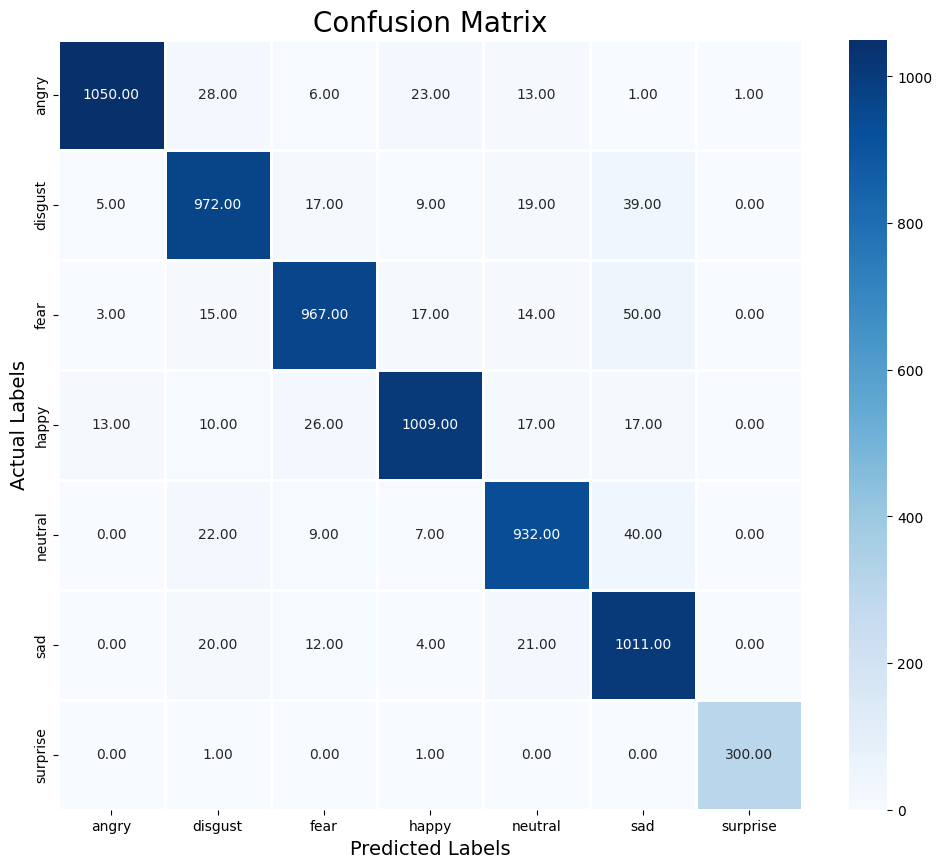

              precision    recall  f1-score   support

       angry       0.98      0.94      0.96      1122
     disgust       0.91      0.92      0.91      1061
        fear       0.93      0.91      0.92      1066
       happy       0.94      0.92      0.93      1092
     neutral       0.92      0.92      0.92      1010
         sad       0.87      0.95      0.91      1068
    surprise       1.00      0.99      1.00       302

    accuracy                           0.93      6721
   macro avg       0.94      0.94      0.94      6721
weighted avg       0.93      0.93      0.93      6721



In [30]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(y_test0, y_pred0)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
#cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='.2f')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()
print(classification_report(y_test0, y_pred0))

In [31]:

from tensorflow.keras.models import Sequential, model_from_json
model_json = model.to_json()
with open("CNN_model_WOnois_new.json", "w") as json_file:
    json_file.write(model_json)

model.save_weights("CNN_model_weights_WOnois_new.h5")
print("Saved model to disk")

Saved model to disk


In [32]:
from tensorflow.keras.models import Sequential, model_from_json
json_file = open('/content/CNN_model_WOnois_new.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("/content/CNN_model_weights_WOnois_new.h5")
print("Loaded model from disk")

Loaded model from disk


In [33]:
loaded_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
score = loaded_model.evaluate(x_testcnn,y_test)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

211/211 [==============================] - 10s 44ms/step - loss: 0.2252 - accuracy: 0.9286
accuracy: 92.86%


In [34]:
import pickle

#Without noise
# Saving scaler
with open('scalerWOn_ew.pickle', 'wb') as f:
    pickle.dump(scaler, f)

# Loading scaler
with open('scalerWOn_ew.pickle', 'rb') as f:
    scaler2 = pickle.load(f)

# Saving encoder
with open('encoderWon_ew.pickle', 'wb') as f:
    pickle.dump(encoder, f)

# Loading encoder
with open('encoderWon_ew.pickle', 'rb') as f:
    encoder2 = pickle.load(f)


print("Done")

Done
